In [25]:
import update
import params
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import transition
import render

In [3]:
baseline = pd.read_csv('baseline.csv')

In [4]:
state = np.asarray([0, 0, 0, 0, params.Ro - params.Rb, 0, 0, 0, 1])
state

array([0.        , 0.        , 0.        , 0.        , 0.09023421,
       0.        , 0.        , 0.        , 1.        ])

In [5]:
times = []
states = []

In [6]:
for i in range(3000):
    times.append(i * params.h)
    states.append(state)
    t_i = 0.2
    if i >= 1000 and i <= 2000:
        t_i = -0.2
    state = update.update_all(state, t_i, debug=False)

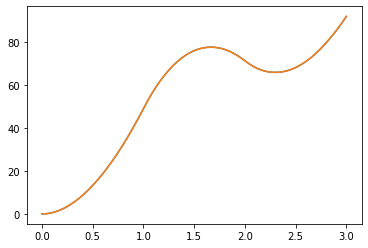

In [7]:
plt.plot(times, [state[0] for state in states])
plt.plot(baseline['time'], baseline['th'])
plt.show()

In [30]:
frames = [render.render(states[10 * i]) for i in range(300)]

In [31]:
len(frames)

300

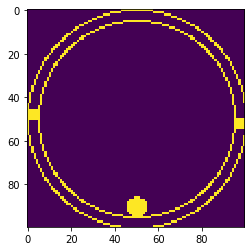

In [35]:
fig = plt.figure()
i=0
im = plt.imshow(frames[0], animated=True)

def updatefig(*args):
    global i
    if (i<300):
        i += 1
    else:
        i=0
    im.set_array(frames[i])
    return im,

ani = animation.FuncAnimation(fig, updatefig,  blit=False)
plt.show()